In [1]:
import numpy
import numpy as np
import scipy
from os.path import join
import matplotlib.pyplot as plt
import matplotlib
import colorsys
import texplot
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from pprint import pprint
import freealg

# Moved to freealg
from freealg.visualization import domain_coloring, glue_branches
from freealg.distributions import MarchenkoPastur, ChiralBlock, DeformedWigner, \
    DeformedMarchenkoPastur, CompoundPoisson

from freealg import AlgebraicForm
from freealg._algebraic_form._sheets_util import track_roots_on_grid, infer_m1_partners_on_cuts
from freealg._algebraic_form._continuation_algebraic import eval_roots, build_sheets_from_roots

plot_dir = '.'

[(0.9018267066766694, 3.2283308327081777), (3.995360090022506, 7.759703675918981)]


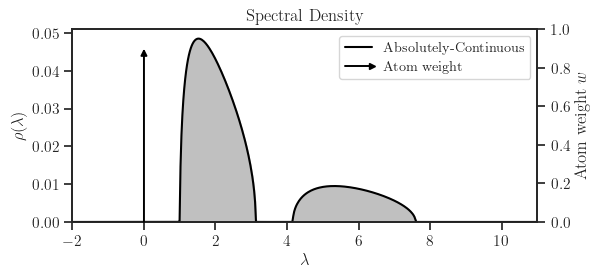

In [2]:
filename = 'algebraic-compound-poisson'
title = 'Compound Free Poisson'

lam = 0.1
t1 = 2.0
t2 = 5.5
w1 = 0.75

cp = CompoundPoisson(t1, t2, w1, lam)

# Support
support = cp.support()
print(support)
a1, b1 = support[0]
if len(support) > 1:
    a2, b2 = support[1]

# Grid
x_min = numpy.floor(min(a for a, b in support) - 1.0)
x_max = numpy.ceil(max(b for a, b in support) + 1.0)
y_min, y_max = -3.0, 3.0

_ = cp.density(plot=True, latex=True, save=False)

def stieltjes(z):
    return cp.stieltjes(z)

def density(x):
    rho = cp.density(x, eta=1e-8)
    # rho[x < 1e-3] = 0.0
    return rho

def m_all_fn(z):
    return cp.roots(z)

In [3]:
# A = cp.matrix(4000, seed=0)
# eig_A = numpy.linalg.eigvalsh(A)

# numpy.save('A.npy', A)
# numpy.save('eig_A.npy', eig_A)

In [4]:
A = numpy.load('A.npy')
eig_A = numpy.load('eig_A.npy')

In [5]:
As = freealg.submatrix(A, 2000, seed=1)
eig_As = numpy.linalg.eigvalsh(As)

fit residual max  : 3.5586e-01
fit residual 99.9%: 3.0093e-02

Coefficients (real)
+1.00000000 +3.42751622 +2.16583082 -0.00000000 
+0.00000000 +1.00000000 +3.71487073 +2.70728852 

Coefficients (imag) norm: 0.0000e+00

	frac_bad: 1.000
	n_bad   : 128
	n_test  : 128

Support:
[(0.3359579788201777, 1.7632859985276004), (1.911777286397969, 4.300077014905118)]



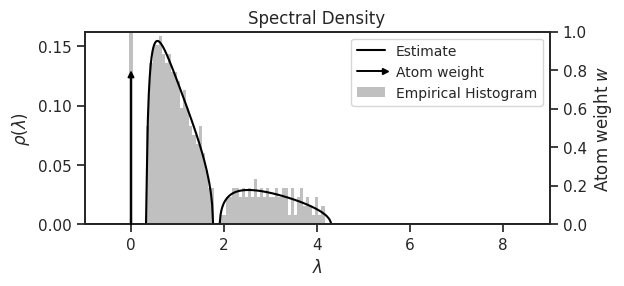

mass: 0.213239


In [6]:
# af = AlgebraicForm(cp)
af = AlgebraicForm(As, delta=1e-5)

deg_m = 3
deg_z = 1

coeffs, est_supp, status = af.fit(
    deg_m, deg_z, reg=0, normalize=True, triangular=None,
    mu='auto', mu_reg=None, verbose=True)

# pprint(status)

print('\nSupport:')
print(est_supp)
print('')

x = numpy.linspace(x_min, x_max, 500)
rho = af.density(x, plot=True, latex=False)

mass = numpy.trapz(rho, x)
print('mass: %f' % mass)

In [7]:
status, info = af.is_decompressible()
print(f'is decompressible: {status}')

is decompressible: True


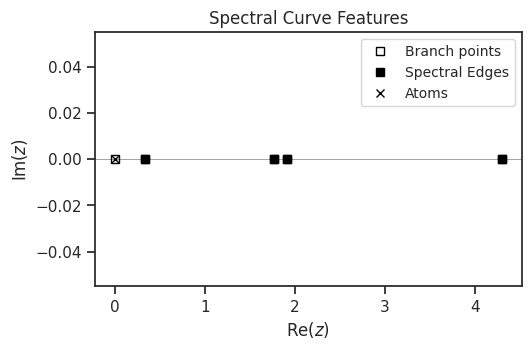

Branch points: [4.30007701e+00 1.91177729e+00 1.76328600e+00 3.35957979e-01
 1.36071551e-15]
Atom location: 0.00
Atom weight: 0.80


In [8]:
# Branch points
bp, info = af.branch_points(tol=1e-16, real_tol=1e-16, plot=True, latex=False)
print(f'Branch points: {bp}')

# Atoms
atoms = af.atoms()
atom_loc, atom_w = atoms[0]

print(f'Atom location: {atom_loc:>0.2f}')
print(f'Atom weight: {atom_w:>0.2f}')

# FD

success rate per t: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


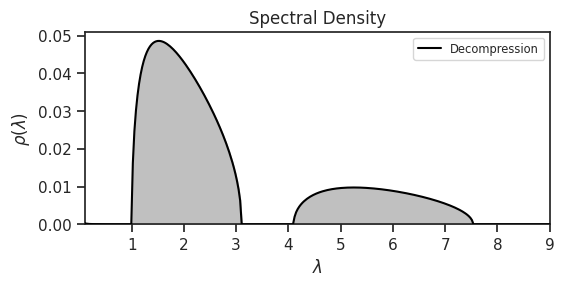

In [9]:
# newton_opt = {'sweep': True}
# newton_opt = {
#     'sweep': True,
#     'sweep_pad': 200,          # much larger than 20
#     'active_imag_eps': 5e-7,   # or ~ 1*eta instead of 50*eta
# }

# -----------------------
# for _decompress.py
# newton_opt = {
#     # 'min_n_times': 50,
#     'sweep': True,
#     'sweep_pad': 30,
#     'active_imag_eps': 1e-6,
# }
# ------------------------
# ---------------------------
## For _decompress4.py
# newton_opt = {
#     "sweep": False,
#     "viterbi_opt": {
#         "lam_space": 1.0,
#         "lam_time": 0.25,
#         "lam_im": 10.0,      # hinge only
#         "edge_k": 12,
#         "lam_asym": 5.0,
#         "lam_norm": 20.0,    # important
#         "refine_newton": True,
#     },
# }

# ---------------------
# newton_opt = {}
# newton_opt = dict(newton_opt)
# newton_opt["eta_hi"] = 3.0
# newton_opt["n_eta"] = 24
# newton_opt["anchor_radius"] = 0.6
# newton_opt["herglotz_tol"] = 0.0  # your convention: Im(m)>0

# newton_opt["viterbi_opt"] = dict(
#     lam_time=0.25,
#     lam_space=1.0,
#     lam_asym=0.2,
#     lam_im2=0.0,     # <-- set to 0 for now
#     edge_k=8,
# )


# ---------------------------

# -------------------------
# For _decompress6.py

# newton_opt = {}
# newton_opt["eta_hi"] = 3.0
# newton_opt["n_eta"] = 24
# newton_opt["anchor_radius"] = 0.6
# newton_opt["herglotz_tol"] = 0.0

# newton_opt["edge_use"] = True
# newton_opt["edge_support"] = est_supp     # <-- from af.fit
# newton_opt["edge_pad"] = 0.0
# newton_opt["im_floor_rel"] = 0.5         # try 0.10–0.30
# newton_opt["w_min"] = 1e-14               # kills the 0j root

# newton_opt["viterbi_opt"] = dict(
#     lam_time=0.25,
#     lam_space=1.0,
#     lam_asym=0.2,
#     lam_im2=0.0,
#     edge_k=8,
# )

# -------------------------

# _defompress7.py
# newton_opt = {}
# newton_opt = dict(
#     max_iter=40, tol=1e-13,
#     damping=1.0, step_clip=5.0,
#     max_split=0,      # IMPORTANT: disable extra intermediate tau tries
#     sweep=False,      # IMPORTANT: avoid bad cross-x seeding
#     require_imw_pos=True, im_eps=1e-14,
#     verbose=False, debug=False,
# )

# newton_opt = dict(
#     max_iter=40, tol=1e-13, damping=1.0,
#     step_clip=5.0, max_split=0, sweep=False,
#     require_imw_pos=True, im_eps=1e-14,
#     verbose=False, debug=False,
# )

# newton_opt['sweep'] = False
# newton_opt = dict(
#     max_iter=40, tol=1e-13, damping=1.0,
#     step_clip=5.0, max_split=8,      # <--- important
#     require_imw_pos=True, im_eps=1e-14,
#     verbose=False, debug=False,
# )


# Evolve
# rho, x = af.decompress([2000, 3000, 4000, 8000], method='one', newton_opt=newton_opt,
#                     verbose=True, plot=True)
# sizes = numpy.arange(1, 4.1, 0.5)
# sizes = numpy.arange(1, 1.5, 0.05)  # For def MP
# sizes = numpy.arange(1, 1, 0.05)  # For def MP
# sizes = [1.0, 1.01, 1.02, 1.05] 
# sizes = np.array([1.0, 1.01])   # smallest step first
# sizes = numpy.arange(1, 1.8, 0.25)
# x = numpy.linspace(0, 12, 100)  # for deformed MP
# x = numpy.linspace(0.5, 9, 100)  # for deformed MP
# x = numpy.linspace(-1, 8, 500)  # for deformed MP
# x = numpy.linspace(-2, 6, 500)
# af.n = As.shape[0]
# x = numpy.linspace(x_min, x_max, 100)

newton_opt = {}
x = numpy.linspace(0.1, x_max, 300)
sizes = numpy.arange(As.shape[0], A.shape[0]+1, 500)

rho, x = af.decompress(sizes, x=x, method='moc', min_n_times=100,
                       newton_opt=newton_opt,
                       verbose=True, plot=True, latex=False)

Plot saved to "/home/sia/work/github/freealg/notebooks/./algebraic-compound-poisson-decompress.pdf".


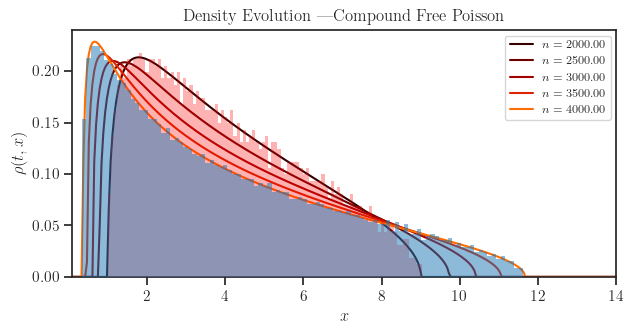

In [42]:
# times_to_show = numpy.arange(0, 1.51, 0.25)
# times_to_show = nump[y.arange(0, 4, 0.25)
# times_to_show = numpy.arange(0, 0.2, 0.05)
# idx = [int(numpy.argmin(numpy.abs(t - tt))) for tt in times_to_show]

num_plots = rho.shape[0]
cmap = plt.get_cmap('gist_heat')
colors = [cmap(i/(num_plots + 2)) for i in range(num_plots + 1)][1:]

with texplot.theme(use_latex=True):
    
    fig, ax = plt.subplots(figsize=(6.5, 3.5))
    
    for i in range(rho.shape[0]):
        ax.plot(x, rho[i], color=colors[i], label=rf'$n={{{sizes[i]:0.2f}}}$')

    ax.hist(eig_As, 100, density=True, zorder=10, alpha=0.3, color='red',
            edgecolor='none')
    ax.hist(eig_A, 100, density=True, zorder=10, alpha=0.5, edgecolor='none')

    ax.set_xlim([x[0], x[-1]])
    # ax.set_ylim(bottom=0)
    # ax.set_ylim([0, 0.2])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$\rho(t, x)$')
    ax.set_title(r'Density Evolution |' + title)
    plt.legend(fontsize='x-small')
    
    plt.tight_layout()
    texplot.show_or_save_plot(plt, default_filename=join(plot_dir, filename + '-decompress.pdf'),
                              transparent_background=True, dpi=200,
                              show_and_save=True, verbose=True)

# Edge and Cusp

In [11]:
t_cusp = numpy.linspace(0, 2, 100)
sol = af.cusp(t_cusp)
t_cusp = sol['t']
x_cusp = sol['x']
sol

{'ok': False,
 't': 0.0,
 'tau': 1.0,
 'zeta': 1.9117772863978901,
 'y': -0.4855416993335191,
 'x': 1.9117772863978901,
 'F': array([-6.21724894e-15,  1.36102669e-15, -1.08374107e-02]),
 'success': True,
 'seed': {'t': 0.0,
  'x': 1.7632859985275995,
  'zeta': 1.7632859985275995,
  'y': -0.43011055915644025},
 'merge': {'bracketed': False},
 'gap_at_t': 0.14849128787044252,
 'lsq_success': True}

In [12]:
t = numpy.linspace(0.0, 1.5, 100)
complex_edges, real_merged_edges, active_k = af.edge(t, verbose=True)

edge success rate: 1.0


Plot saved to "/home/sia/work/github/freealg/notebooks/./algebraic-compound-poisson-edge.pdf".


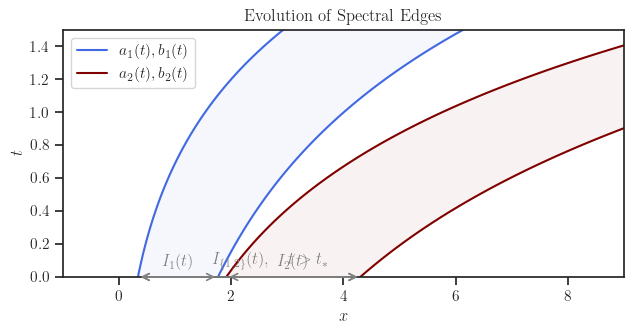

In [13]:
k = len(support)

colors = ['royalblue', 'maroon']

with texplot.theme(use_latex=True):
    
    fig, ax = plt.subplots(figsize=(6.5, 3.5))
    for j in range(k):
        a_r = real_merged_edges[:, 2*j + 0]
        b_r = real_merged_edges[:, 2*j + 1]

        a_c = complex_edges[:, 2*j + 0].real
        b_c = complex_edges[:, 2*j + 1].real

        # Plot spectral edges with solid lines
        ax.plot(a_r, t, color=colors[j], label=rf'$a_{{{j+1}}}(t), b_{{{j+1}}}(t)$')
        ax.plot(b_r, t, color=colors[j])

        # Plot ghost edges with dashed lines
        m_a = numpy.isnan(a_r)
        m_b = numpy.isnan(b_r)
        ax.plot(a_c[m_a], t[m_a], '--', color=colors[j], alpha=0.25, zorder=-1)
        ax.plot(b_c[m_b], t[m_b], '--', color=colors[j], alpha=0.25, zorder=-1)

        # Fill between
        ax.fill_betweenx(t, a_c, b_c, color=colors[j], alpha=0.05, zorder=-2)
        
        # --------
        # Plot I_j
        # --------
        
        t_mid = 0.5 * min(t_cusp, t[-1]) if 't_cusp' in globals() else 0.5 * t[-1]
        j_mid = int(numpy.argmin(numpy.abs(t - t_mid)))
        
        ax.annotate('', xy=(b_r[j_mid], t[j_mid]), xytext=(a_r[j_mid], t[j_mid]),
                    arrowprops=dict(arrowstyle='<->', color='gray', lw=1.2))
        
        ax.text(0.5 * (a_r[j_mid] + b_r[j_mid]), t[j_mid] + 0.03 * (t[-1] - t[0]),
                fr'$I_{{{j+1}}}(t)$',
                color='gray', ha='center', va='bottom')

    # ----------------
    # Plot I_1 cup I_2
    # ----------------
    
    a_all = real_merged_edges[:, 0]
    b_all = real_merged_edges[:, -1]

    t_mid2 = 0.5 * min(t_cusp, t[-1]) if 't_cusp' in globals() else 0.5 * t[-1]
    j_mid2 = int(numpy.argmin(numpy.abs(t - t_mid2)))
    
    ax.annotate('', xy=(b_all[j_mid2], t[j_mid2]), xytext=(a_all[j_mid2], t[j_mid2]),
                arrowprops=dict(arrowstyle='<->', color='gray', lw=1.2))
    
    ax.text(0.58 * (a_all[j_mid2] + b_all[j_mid2]), t[j_mid2] + 0.03 * (t[-1] - t[0]),
            # r'$I_1(t) \cup I_2(t)$',
            r'$I_{\{1,2\}}(t), \quad t > t_{\ast}$',
            color='gray', ha='center', va='bottom')

    # ---------------------

    # Cusp
    # if 't_cusp' in globals():
    #     ax.plot(x_cusp, t_cusp, '*', color='black')
    #     ax.text(x_cusp + 0.08, t_cusp + 0.03, r'$(x_{\ast}, t_{\ast})$')

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([t[0], t[-1]])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$t$')
    ax.set_title(r'Evolution of Spectral Edges')
    ax.legend()
    plt.tight_layout()
    
    texplot.show_or_save_plot(plt, default_filename=join(plot_dir, filename + '-edge.pdf'),
                              transparent_background=True, dpi=200,
                              show_and_save=True, verbose=True)

# Edge and Histogram

In [14]:
T = numpy.log(sizes[-1] / sizes[0])
t = numpy.linspace(0.0, T, 1000)
complex_edges, real_merged_edges, active_k = af.edge(t, verbose=True)

edge success rate: 1.0


Plot saved to "/home/sia/work/github/freealg/notebooks/./algebraic-compound-poisson-edge-hist.pdf".


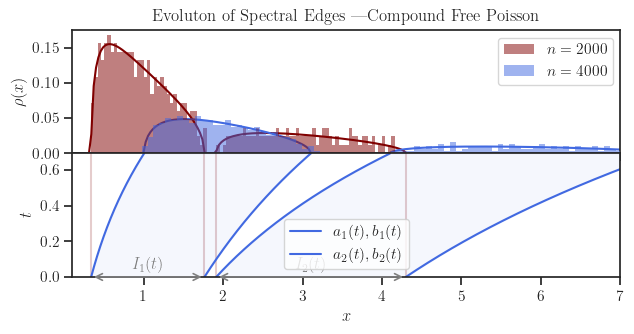

In [17]:
k = len(support)

x_min = 1e-1
x_max = 7

# colors = ['royalblue', 'maroon']
colors = ['royalblue', 'royalblue']

with texplot.theme(use_latex=True):
    
    fig, ax = plt.subplots(figsize=(6.5, 3.5), nrows=2, sharex=True) 

    # Histogram
    ax[0].hist(eig_As, 100, density=True, zorder=10, alpha=0.5, color='maroon',
               edgecolor='none', label=rf'$n = {{{sizes[0]}}}$')
    ax[0].hist(eig_A, 100, density=True, zorder=10, alpha=0.5, color='royalblue',
               edgecolor='none', label=rf'$n = {{{sizes[-1]}}}$')
    
    ax[0].set_xlim([x[0], x[-1]])
    # ax[0].set_ylim(bottom=0)
    ax[0].set_ylim([0, 0.175])
    # ax[0].set_xlabel(r'$x$')
    ax[0].set_ylabel(r'$\rho(x)$')
    ax[0].set_title(r'Evoluton of Spectral Edges |' + title)
    ax[0].legend()
    ax[0].tick_params(labelbottom=False)

    # rho
    # num_plots = rho.shape[0]
    # cmap = plt.get_cmap('gist_heat')
    # colors = [cmap(i/(num_plots + 2)) for i in range(num_plots + 1)][1:]
    ax[0].plot(x, rho[0], color='maroon')
    ax[0].plot(x, rho[-1], color='royalblue')
    
    for j in range(k):
        a_r = real_merged_edges[:, 2*j + 0]
        b_r = real_merged_edges[:, 2*j + 1]

        a_c = complex_edges[:, 2*j + 0].real
        b_c = complex_edges[:, 2*j + 1].real

        # Plot spectral edges with solid lines
        ax[1].plot(a_r, t, color=colors[j], label=rf'$a_{{{j+1}}}(t), b_{{{j+1}}}(t)$')
        ax[1].plot(b_r, t, color=colors[j])

        # Plot ghost edges with dashed lines
        m_a = numpy.isnan(a_r)
        m_b = numpy.isnan(b_r)
        ax[1].plot(a_c[m_a], t[m_a], '--', color=colors[j], alpha=0.25, zorder=-1)
        ax[1].plot(b_c[m_b], t[m_b], '--', color=colors[j], alpha=0.25, zorder=-1)

        # Fill between
        ax[1].fill_betweenx(t, a_c, b_c, color=colors[j], alpha=0.05, zorder=-2)

        ax[1].axvline(a_c[0], color='maroon',alpha=0.2, zorder=-10)
        ax[1].axvline(b_c[0], color='maroon', alpha=0.2, zorder=-10)
        
        # --------
        # Plot I_j
        # --------
        
        t_mid = 0.5 * min(t_cusp, t[-1]) if 't_cusp' in globals() else 0.5 * t[-1]
        j_mid = int(numpy.argmin(numpy.abs(t - t_mid)))
        
        ax[1].annotate('', xy=(b_r[j_mid], t[j_mid]), xytext=(a_r[j_mid], t[j_mid]),
                    arrowprops=dict(arrowstyle='<->', color='gray', lw=1.2))
        
        ax[1].text(0.5 * (a_r[j_mid] + b_r[j_mid]), t[j_mid] + 0.03 * (t[-1] - t[0]),
                fr'$I_{{{j+1}}}(t)$',
                color='gray', ha='center', va='bottom')

    # ----------------
    # Plot I_1 cup I_2
    # ----------------
    
    # a_all = real_merged_edges[:, 0]
    # b_all = real_merged_edges[:, -1]

    # t_mid2 = 0.5 * min(t_cusp, t[-1]) if 't_cusp' in globals() else 0.5 * t[-1]
    # j_mid2 = int(numpy.argmin(numpy.abs(t - t_mid2)))
    
    # ax[1].annotate('', xy=(b_all[j_mid2], t[j_mid2]), xytext=(a_all[j_mid2], t[j_mid2]),
    #                arrowprops=dict(arrowstyle='<->', color='gray', lw=1.2))
    
    # ax[1].text(0.58 * (a_all[j_mid2] + b_all[j_mid2]), t[j_mid2] + 0.03 * (t[-1] - t[0]),
    #            # r'$I_1(t) \cup I_2(t)$',
    #            r'$I_{\{1,2\}}(t), \quad t > t_{\ast}$',
    #            color='gray', ha='center', va='bottom')

    # ---------------------

    # Cusp
    # if 't_cusp' in globals():
    #     ax[1].plot(x_cusp, t_cusp, '*', color='black')
    #     ax[1].text(x_cusp + 0.08, t_cusp + 0.03, r'$(x_{\ast}, t_{\ast})$')

    ax[1].set_xlim([x_min, x_max])
    ax[1].set_ylim([t[0], t[-1]])
    ax[1].set_xlabel(r'$x$')
    ax[1].set_ylabel(r'$t$')
    # ax[1].set_title(r'Evolution of Spectral Edges')
    ax[1].legend()
    
    plt.tight_layout()
    fig.subplots_adjust(hspace=0)
    
    texplot.show_or_save_plot(plt, default_filename=join(plot_dir, filename + '-edge-hist.pdf'),
                              transparent_background=True, dpi=200,
                              show_and_save=True, verbose=True)